# Einstein Rosen Metric
##  Geoff Cope
##  University of Utah
##  December 22, 2021

One reference for the Einstein Rosen Metric is given here in the paper:  "Rotation Halts Cylindrical Relativistic Gravitational Collapse" by Apostolatos & Thorne.  The vacuum field equations are listed as equation 16 which we derive here.

https://core.ac.uk/download/pdf/216103864.pdf

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.46.2435

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,z,phi,dt,dr,dz,dphi = symbols('t r z phi dt dr dz dphi')

In [4]:
gamma = symbols('gamma')
psi = symbols('psi')

In [5]:
variables = Matrix( [t,r,z,phi])
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢z⎥
⎢ ⎥
⎣φ⎦

In [6]:
differentials = Matrix( [dt,dr,dz,dphi])
differentials

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢ dz ⎥
⎢    ⎥
⎣dphi⎦

In [7]:
gamma = Function('gamma')(t,r)
gamma

In [8]:
psi = Function('psi')(t,r)
psi

In [9]:
lineElement = expand(exp(2*(gamma-psi))* ((-1)*dt**2 + dr**2) + exp(2*psi)*dz**2 + r**2 * exp((-1)*2*psi)*dphi**2)
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(t, r)  -2⋅ψ(t, r)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                 0             0       ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(t, r)  -2⋅ψ(t, r)                            ⎥
⎢           0             ℯ         ⋅ℯ                0             0       ⎥
⎢                                                                           ⎥
⎢                                                  2⋅ψ(t, r)                ⎥
⎢           0                       0             ℯ                 0       ⎥
⎢                                                                           ⎥
⎢                                                              2  -2⋅ψ(t, r)⎥
⎣           0                       0                 0       r ⋅ℯ          ⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡  2⋅γ(t, r)  -2⋅ψ(t, r)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                 0             0       ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(t, r)  -2⋅ψ(t, r)                            ⎥
⎢           0             ℯ         ⋅ℯ                0             0       ⎥
⎢                                                                           ⎥
⎢                                                  2⋅ψ(t, r)                ⎥
⎢           0                       0             ℯ                 0       ⎥
⎢                                                                           ⎥
⎢                                                              2  -2⋅ψ(t, r)⎥
⎣           0                       0                 0       r ⋅ℯ          ⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t r z phi")
t,r,z,phi = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                                                          
⎢⎡ ⎛     2⋅γ(t, r)  -2⋅ψ(t, r) ∂                2⋅γ(t, r)  -2⋅ψ(t, r) ∂          ⎞  -2⋅γ(t, r)  2⋅ψ(t, r)    ⎛     2⋅γ(t, r
⎢⎢-⎜- 2⋅ℯ         ⋅ℯ          ⋅──(γ(t, r)) + 2⋅ℯ         ⋅ℯ          ⋅──(ψ(t, r))⎟⋅ℯ          ⋅ℯ            -⎜- 2⋅ℯ        
⎢⎢ ⎝                           ∂t                                     ∂t         ⎠                           ⎝             
⎢⎢────────────────────────────────────────────────────────────────────────────────────────────────────────  ───────────────
⎢⎢                                                   2                                                                     
⎢⎢                                                                                                                         
⎢⎢ ⎛     2⋅γ(t, r)  -2⋅ψ(t, r) ∂                2⋅γ(t, r)  -2⋅ψ(t, r) ∂          ⎞  -2⋅γ(t, r)  2⋅ψ(t, r)    ⎛     2⋅γ(t, r
⎢⎢-⎜- 2⋅

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞                                          
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂             ∂                        
⎢r⋅⎜───(γ(t, r)) - ───(γ(t, r)) - ───(ψ(t, r)) - 2⋅⎜──(ψ(t, r))⎟  + ───(ψ(t, r))⎟ + ──(γ(t, r)) - ──(ψ(t, r))              
⎢  ⎜  2              2              2              ⎝∂t         ⎠      2         ⎟   ∂r            ∂r                       
⎢  ⎝∂r             ∂t             ∂r                                ∂t          ⎠                                          
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────              
⎢                                                     r                                                                    
⎢                                                                                                                          
⎢       

In [18]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                        ∂                                               ∂                                 
⎢               2                2   1.0⋅──(γ(t, r))                                     ──(γ(t, r))                       
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂r                    ∂           ∂             ∂t                                
⎢- ⎜──(ψ(t, r))⎟  - ⎜──(ψ(t, r))⎟  + ───────────────       - 2⋅──(ψ(t, r))⋅──(ψ(t, r)) + ───────────                       
⎢  ⎝∂r         ⎠    ⎝∂t         ⎠           r                  ∂r          ∂t                 r                            
⎢                                                                                                                          
⎢                                   ∂                                                         ∂                            
⎢                                   ──(γ(t, r))                      2                2   1.0⋅──(γ(t, r))                  
⎢       

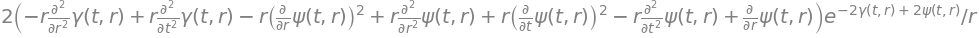

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢       

In [21]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢       

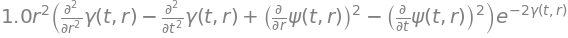

In [23]:
einstein33 = simplify(einst.tensor())[3,3]
einstein33

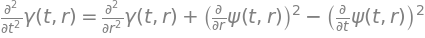

In [24]:
equation16a =  Eq(diff(gamma,t,2),solve( einstein33.args[2] , diff(gamma,t,2) )[0] )
equation16a 

In [25]:
equation16b = Eq(diff(gamma,r),solve( simplify(einst.tensor())[0,0] , diff(gamma,r) )[0] )
equation16b

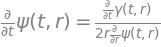

In [29]:
equation16c = Eq(diff(psi,t),solve(simplify(einst.tensor())[0,1] , diff(psi,t) )[0])
equation16c 

In [31]:
fieldEquations = Matrix([equation16a,equation16b,equation16c] ) 
fieldEquations

⎡  2              2                         2                2⎤
⎢ ∂              ∂             ⎛∂          ⎞    ⎛∂          ⎞ ⎥
⎢───(γ(t, r)) = ───(γ(t, r)) + ⎜──(ψ(t, r))⎟  - ⎜──(ψ(t, r))⎟ ⎥
⎢  2              2            ⎝∂r         ⎠    ⎝∂t         ⎠ ⎥
⎢∂t             ∂r                                            ⎥
⎢                                                             ⎥
⎢                      ⎛             2                2⎞      ⎥
⎢      ∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟      ⎥
⎢      ──(γ(t, r)) = r⋅⎜⎜──(ψ(t, r))⎟  + ⎜──(ψ(t, r))⎟ ⎟      ⎥
⎢      ∂r              ⎝⎝∂r         ⎠    ⎝∂t         ⎠ ⎠      ⎥
⎢                                                             ⎥
⎢                                ∂                            ⎥
⎢                                ──(γ(t, r))                  ⎥
⎢                ∂               ∂t                           ⎥
⎢                ──(ψ(t, r)) = ───────────────                ⎥
⎢                ∂t                ∂    